In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [18]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()


x_train = x_train / 255
x_test = x_test / 255


x_train.shape, y_train.shape, x_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

5


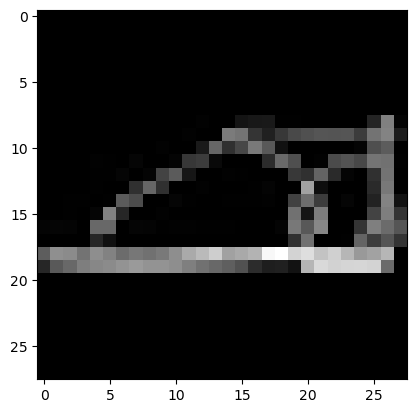

In [17]:
print(y_train[133])
plt.imshow(x_train[133], cmap='grey')

In [19]:
def plot_history(hst):
    plt.figure(figsize=(13, 4))

    plt.subplot(1, 2, 1)
    plt.plot(hst.history['loss'], label='train')
    plt.plot(hst.history['val_loss'], label='test')
    plt.title('Loss')

    plt.subplot(1, 2, 2)
    plt.plot([round(100*e, 2) for e in hst.history['sparse_categorical_accuracy']], label='train')
    plt.plot([round(100*e, 2) for e in hst.history['val_sparse_categorical_accuracy']], label='test')
    plt.title('Accuracy')    

    plt.ylim(0, 100)
    plt.legend()
    plt.tight_layout()
    plt.show()

In [78]:

activation_list = ['softplus', 'relu', 'tanh', 'elu', 'sigmoid', 'linear', 'softmax']

optimizers_list = [
    tf.keras.optimizers.Adam,
    tf.keras.optimizers.Adagrad,
    tf.keras.optimizers.AdamW,
    tf.keras.optimizers.Adamax,
    tf.keras.optimizers.Ftrl,
    tf.keras.optimizers.Lion,
    tf.keras.optimizers.Nadam,
    tf.keras.optimizers.RMSprop,
    tf.keras.optimizers.SGD
]

collect = {}

for act in activation_list:
    for opt_class in optimizers_list:
        # Build and compile model
        model = tf.keras.Sequential([
            tf.keras.layers.Flatten(input_shape=(28, 28)),
            tf.keras.layers.Dense(128, activation=act),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dropout(0.5),
            tf.keras.layers.Dense(64, activation=act),
            tf.keras.layers.BatchNormalization(),
            tf.keras.layers.Dense(32, activation=act),
            tf.keras.layers.Dense(10)
        ])
        optimizer = opt_class(learning_rate=0.001)
        model.compile(
            loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
            optimizer=optimizer,
            metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
        )

        # Train model
        history = model.fit(x_train, y_train, epochs=15, validation_data=(x_test, y_test), verbose=0)

        # Extract validation accuracy
        val_acc = history.history['val_sparse_categorical_accuracy']
        max_val_acc = max(val_acc)
        best_epoch = val_acc.index(max_val_acc) + 1

        # Print results for current combination
        print(f"Optimizer: {optimizer.__class__.__name__}, Activation: {act}, "
              f"Max Val Accuracy: {max_val_acc:.2f}, Best Epoch: {best_epoch}")

        # Store validation accuracy in the dictionary
        key = f"{optimizer.__class__.__name__}_{act}"
        collect[key] = {'max_val_accuracy': max_val_acc, 'best_epoch': best_epoch}


Optimizer: Adam, Activation: softplus, Max Val Accuracy: 0.88, Best Epoch: 14
Optimizer: Adagrad, Activation: softplus, Max Val Accuracy: 0.83, Best Epoch: 15
Optimizer: AdamW, Activation: softplus, Max Val Accuracy: 0.88, Best Epoch: 11
Optimizer: Adamax, Activation: softplus, Max Val Accuracy: 0.88, Best Epoch: 15
Optimizer: Ftrl, Activation: softplus, Max Val Accuracy: 0.10, Best Epoch: 1
Optimizer: Lion, Activation: softplus, Max Val Accuracy: 0.87, Best Epoch: 15
Optimizer: Nadam, Activation: softplus, Max Val Accuracy: 0.88, Best Epoch: 14
Optimizer: RMSprop, Activation: softplus, Max Val Accuracy: 0.88, Best Epoch: 14
Optimizer: SGD, Activation: softplus, Max Val Accuracy: 0.83, Best Epoch: 15
Optimizer: Adam, Activation: relu, Max Val Accuracy: 0.87, Best Epoch: 15
Optimizer: Adagrad, Activation: relu, Max Val Accuracy: 0.83, Best Epoch: 15
Optimizer: AdamW, Activation: relu, Max Val Accuracy: 0.87, Best Epoch: 15
Optimizer: Adamax, Activation: relu, Max Val Accuracy: 0.87, Bes

In [ ]:
best_key = max(collect, key=lambda k: collect[k]['max_val_accuracy'])
best_accuracy = collect[best_key]['max_val_accuracy']
best_epoch = collect[best_key]['best_epoch']

# Выведем информацию
print(f"Лучший результат: {best_key}, Max Val Accuracy: {best_accuracy:.4f}, Best Epoch: {best_epoch}")

Лучший результат: Nadam_elu, Max Val Accuracy: 0.8829, Best Epoch: 13


После тестов на разных функциях активации и оптимизаторах решил усложнить можеть. Добавил нейроды и петлю для проверки разных батчей + увеличил количество эпох

In [103]:
batch = {32, 64}

for i in batch:
    model = tf.keras.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(1028, activation='elu'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='sigmoid'),
        tf.keras.layers.BatchNormalization(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(512, activation='elu'),
        tf.keras.layers.Dense(10)
        ])
    optimizer = tf.keras.optimizers.Nadam(learning_rate=0.0001)
    model.compile(
        loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
        optimizer=optimizer,
        metrics=[tf.keras.metrics.SparseCategoricalAccuracy()]
        )


    history = model.fit(x_train, y_train, epochs=100, batch_size = i, validation_data=(x_test, y_test), verbose=0)

    val_acc = history.history['val_sparse_categorical_accuracy']
    max_val_acc = max(val_acc)
    best_epoch = val_acc.index(max_val_acc) + 1


    print(f"Val Accuracy: {max_val_acc:.3f} for batch {i}, Best Epoch: {best_epoch}")

Val Accuracy: 0.906 for batch 32, Best Epoch: 92
Val Accuracy: 0.905 for batch 64, Best Epoch: 76


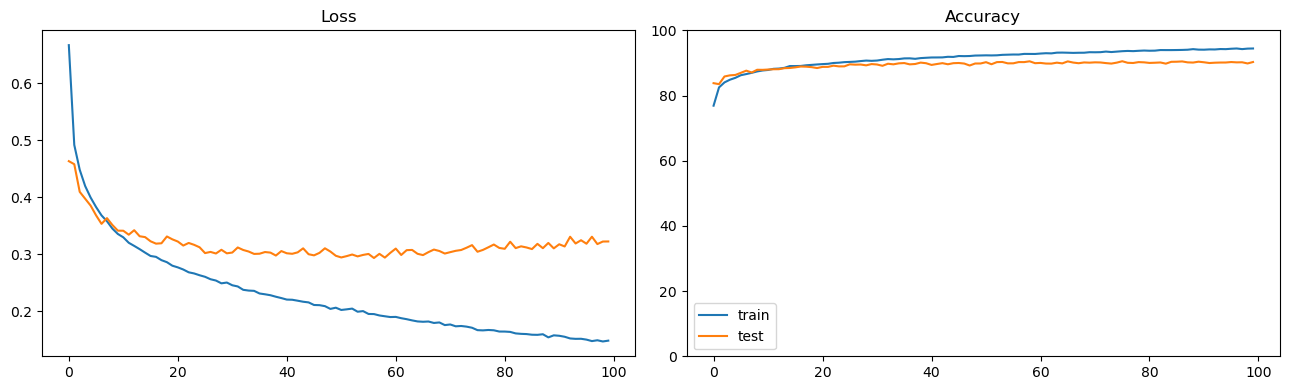

In [104]:
plot_history(history)